In [1]:
# Kaggle Titanic survivor prediction ML Practice

In [811]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [812]:
train = pd.read_csv("/Users/abhinav/ML/titanic/data/train.csv")
test = pd.read_csv('/Users/abhinav/ML/titanic/data/test.csv')

In [898]:
test_df = pd.read_csv('/Users/abhinav/ML/titanic/data/test.csv')

In [813]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [814]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [815]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [816]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [817]:
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [818]:
import re
def getTitle(cols):
    name = cols[0]
    res = re.findall(' ([A-Za-z]+)\.', name)
    return res[0]

In [819]:
train['Title'] = train[['Name']].apply(getTitle, axis=1)

In [820]:
test['Title'] = test[['Name']].apply(getTitle, axis=1)

In [821]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [822]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [823]:
def updateTitle(cols):
    title = cols[0]
    if title in ['Capt', 'Col', 'Countess', 'Don', 'Don', 'Jonkheer', 'Rev', 'Dona', 'Major']:
        return 'Other'
    elif title == 'Mlle':
        return 'Miss'
    elif title == 'Ms':
        return 'Miss'
    elif title == 'Mme':
        return 'Mrs'
    else:
        return title
    

In [824]:
train['Title'] = train[['Title']].apply(updateTitle, axis=1)

In [825]:
test['Title'] = test[['Title']].apply(updateTitle, axis=1)

In [826]:
pd.crosstab(train['Title'], train['Survived'])

Survived,0,1
Title,,
Dr,4,3
Lady,0,1
Master,17,23
Miss,55,130
Mr,436,81
Mrs,26,100
Other,11,3
Sir,0,1


In [828]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Lady":6, "Sir":7, "Other": 8}
train['Title'] = train[['Title']].applymap(lambda s: title_mapping.get(s) if s in title_mapping else 0)

In [829]:
test['Title'] = test[['Title']].applymap(lambda s: title_mapping.get(s) if s in title_mapping else 0)

In [830]:
train.drop('Ticket', axis=1,inplace=True)

In [831]:
test.drop('Ticket', axis=1,inplace=True)

In [832]:
sex_map = {"male":0, "female":1}
train['Sex'] = train[['Sex']].applymap(lambda s: sex_map.get(s))

In [833]:
test['Sex'] = test[['Sex']].applymap(lambda s: sex_map.get(s))

In [834]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,S,1


In [835]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [836]:
emb_map = {"S":0, "C":1, 'Q':2}
train['Embarked'] = train[['Embarked']].applymap(lambda s: emb_map.get(s))

In [837]:
test['Embarked'] = test[['Embarked']].applymap(lambda s: emb_map.get(s))

In [838]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,0.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,1.0,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,0.0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,0.0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,0.0,1


In [839]:
def isFamily(cols):
    sib = cols[0]
    par = cols[1]
    if sib > 0 or par > 0:
        return 1
    else:
        return 0

In [840]:
train['isFamily'] = train[['SibSp', 'Parch']].apply(isFamily, axis=1)

In [841]:
test['isFamily'] = test[['SibSp', 'Parch']].apply(isFamily, axis=1)

In [842]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,isFamily
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,NaN,0.0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C85,1.0,3,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,NaN,0.0,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,C123,0.0,3,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,NaN,0.0,1,0


In [843]:
train.drop('SibSp', axis=1, inplace=True)

In [844]:
test.drop('SibSp', axis=1, inplace=True)

In [845]:
train.drop('Parch', axis=1, inplace=True)

In [846]:
test.drop('Parch', axis=1, inplace=True)

In [849]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,isFamily
0,1,0,3,0,22.0,7.2500,NaN,0.0,1,1
1,2,1,1,1,38.0,71.2833,C85,1.0,3,1
2,3,1,3,1,26.0,7.9250,NaN,0.0,2,0
3,4,1,1,1,35.0,53.1000,C123,0.0,3,1
4,5,0,3,0,35.0,8.0500,NaN,0.0,1,0


In [848]:
train.drop('Name', axis=1, inplace=True)

In [850]:
test.drop('Name', axis=1, inplace=True)

In [851]:
train.Sex.unique()

array([0, 1])

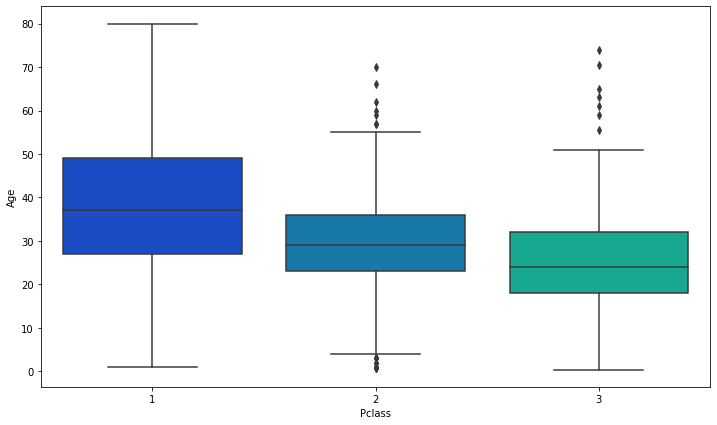

In [852]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [853]:
def getAge(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [854]:
train['Age'] = train[['Age','Pclass']].apply(getAge,axis=1)

In [855]:
test['Age'] = test[['Age','Pclass']].apply(getAge,axis=1)

In [856]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,isFamily
0,1,0,3,0,22.0,7.2500,NaN,0.0,1,1
1,2,1,1,1,38.0,71.2833,C85,1.0,3,1
2,3,1,3,1,26.0,7.9250,NaN,0.0,2,0
3,4,1,1,1,35.0,53.1000,C123,0.0,3,1
4,5,0,3,0,35.0,8.0500,NaN,0.0,1,0


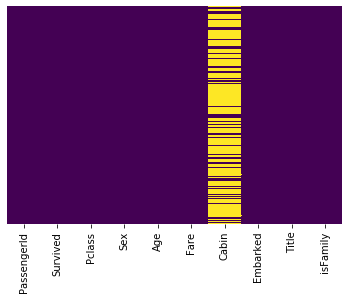

In [857]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [858]:
train['AgeInterval'] = pd.cut(train['Age'], 8)

In [859]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,isFamily,AgeInterval
0,1,0,3,0,22.0,7.2500,NaN,0.0,1,1,"(20.315, 30.263]"
1,2,1,1,1,38.0,71.2833,C85,1.0,3,1,"(30.263, 40.21]"
2,3,1,3,1,26.0,7.9250,NaN,0.0,2,0,"(20.315, 30.263]"
3,4,1,1,1,35.0,53.1000,C123,0.0,3,1,"(30.263, 40.21]"
4,5,0,3,0,35.0,8.0500,NaN,0.0,1,0,"(30.263, 40.21]"


In [860]:
train[['AgeInterval', 'Survived']].groupby(['AgeInterval'], as_index=False).mean()

,AgeInterval,Survived
0,"(0.34, 10.368]",0.593750
1,"(10.368, 20.315]",0.382609
2,"(20.315, 30.263]",0.323607
3,"(30.263, 40.21]",0.448649
4,"(40.21, 50.158]",0.383721
5,"(50.158, 60.105]",0.404762
6,"(60.105, 70.052]",0.235294
7,"(70.052, 80.0]",0.200000


In [861]:
def ageGroup(cols):
    age = cols[0]
    if age >= 0 and age < 10:
        return 0
    elif age >= 10 and age < 20:
        return 1
    elif age >= 20 and age < 30:
        return 2
    elif age >= 30 and age < 40:
        return 3
    elif age >= 40 and age < 50:
        return 4
    elif age >= 50 and age < 60:
        return 5
    elif age >= 60 and age < 70:
        return 6
    elif age >= 70 and age < 80:
        return 7
    elif age >= 80:
        return 8

In [862]:
train['Age'] = train[['Age']].apply(ageGroup,axis=1)

In [863]:
test['Age'] = test[['Age']].apply(ageGroup,axis=1)

In [864]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,isFamily,AgeInterval
0,1,0,3,0,2,7.2500,NaN,0.0,1,1,"(20.315, 30.263]"
1,2,1,1,1,3,71.2833,C85,1.0,3,1,"(30.263, 40.21]"
2,3,1,3,1,2,7.9250,NaN,0.0,2,0,"(20.315, 30.263]"
3,4,1,1,1,3,53.1000,C123,0.0,3,1,"(30.263, 40.21]"
4,5,0,3,0,3,8.0500,NaN,0.0,1,0,"(30.263, 40.21]"


In [865]:
train.Age.unique()

array([2, 3, 5, 0, 1, 4, 6, 7, 8])

In [866]:
train.drop('AgeInterval', axis=1, inplace=True)

In [867]:
train.Embarked.unique()

array([ 0.,  1.,  2., nan])

In [869]:
train['Embarked'] = train['Embarked'].fillna(0.0)

In [870]:
test['Embarked'] = test['Embarked'].fillna(0.0)

In [871]:
train.Embarked.unique()

array([0., 1., 2.])

In [872]:
test.Embarked.unique()

array([2, 0, 1])

In [873]:
pd.qcut(train['Fare'], 4)

0       (-0.001, 7.91]
1      (31.0, 512.329]
2       (7.91, 14.454]
3      (31.0, 512.329]
4       (7.91, 14.454]
            ...       
886     (7.91, 14.454]
887     (14.454, 31.0]
888     (14.454, 31.0]
889     (14.454, 31.0]
890     (-0.001, 7.91]
Name: Fare, Length: 891, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.91] < (7.91, 14.454] < (14.454, 31.0] < (31.0, 512.329]]

In [874]:
train.Fare.unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [875]:
train['FareGroup'] = pd.qcut(train['Fare'], 5)

In [876]:
train.FareGroup.unique()

[(-0.001, 7.854], (39.688, 512.329], (7.854, 10.5], (10.5, 21.679], (21.679, 39.688]]
Categories (5, interval[float64]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.679] < (21.679, 39.688] < (39.688, 512.329]]

In [877]:
def fareGroup(cols):
    fare = cols[0]
    if fare >= -0.001 and fare < 7.854:
        return 0
    elif fare >= 7.854 and fare < 10.5:
        return 1
    elif fare >= 10.5 and fare < 21.679:
        return 2
    elif fare >= 21.679 and fare < 39.688:
        return 3
    elif fare >= 39.688 and fare < 512.329:
        return 4
    elif fare >= 512.329:
        return 5

In [878]:
train['Fare'] = train[['Fare']].apply(fareGroup,axis=1)

In [879]:
test['Fare'] = test[['Fare']].apply(fareGroup,axis=1)

In [880]:
train.Fare.unique()

array([0, 4, 1, 2, 3, 5])

In [881]:
train.drop('FareGroup', axis=1, inplace=True)

In [882]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,isFamily
0,1,0,3,0,2,0,NaN,0.0,1,1
1,2,1,1,1,3,4,C85,1.0,3,1
2,3,1,3,1,2,1,NaN,0.0,2,0
3,4,1,1,1,3,4,C123,0.0,3,1
4,5,0,3,0,3,1,NaN,0.0,1,0


In [883]:
train.drop('Cabin', axis=1, inplace=True)
train.drop('PassengerId', axis=1, inplace=True)

In [884]:
test.drop('Cabin', axis=1, inplace=True)
test.drop('PassengerId', axis=1, inplace=True)

In [885]:
def ageClass(cols):
    age = cols[0]
    pclass = cols[1]
    
    return age*pclass

In [886]:
train['AgeClass'] = train[['Age', 'Pclass']].apply(ageClass,axis=1)

In [887]:
test['AgeClass'] = test[['Age', 'Pclass']].apply(ageClass,axis=1)

In [888]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,isFamily,AgeClass
0,0,3,0,2,0,0.0,1,1,6
1,1,1,1,3,4,1.0,3,1,3
2,1,3,1,2,1,0.0,2,0,6
3,1,1,1,3,4,0.0,3,1,3
4,0,3,0,3,1,0.0,1,0,9


In [889]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,isFamily,AgeClass
0,3,0,3,0,2,1,0,9
1,3,1,4,0,0,3,1,12
2,2,0,6,1,2,1,0,12
3,3,0,2,1,0,1,0,6
4,3,1,2,2,0,3,1,6


In [890]:
X = train.drop('Survived', axis=1)

In [891]:
Y = train['Survived']

In [892]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [893]:
from sklearn.ensemble import RandomForestClassifier

In [894]:
rfc = RandomForestClassifier(n_estimators=200)

In [895]:
rfc.fit(X, Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [904]:
rfc.score(X, Y)

0.8855218855218855

In [897]:
pred = rfc.predict(test)

In [899]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": pred
    })

In [901]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [903]:
submission.to_csv('/Users/abhinav/ML/titanic/submission.csv', index=False)